<a href="https://colab.research.google.com/github/HerbertAnchovy/notebooks/blob/master/Week_3_project_J_Phipps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<a id="Top"></a>
<img style="float: left;" src="https://msds.open.ac.uk/includes/oulogo_hor_75x55.gif">&nbsp;&nbsp;&nbsp;
</div>
<br/>
<br/>

# Project 3: GDP and life expectancy

#### produced by [Jez Phipps](https://www.futurelearn.com/profiles/3841612) on 30<sup>th</sup> October 2016 with absolutely no assistance from Michel Wermelinger whatsoever.

This is the project notebook for Week 3 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2013 and the life expectancy of people born in that country in 2013.

The project has also been <a href="#Ext">extended</a> to answer some key questions including those concerning whether GDP per capita has greater bearing on life expectancy than GDP.

In [0]:
from IPython.display import display, HTML
HTML('''Note: <p style="display:inline;color:darkred;">Option to toggle code visibility on/off is at <a href="#Bottom">bottom</a> of page.</p>''')

## Getting the data

Two datasets of the World Bank are considered. One dataset, available at <http://data.worldbank.org/indicator/NY.GDP.MKTP.CD>, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at <http://data.worldbank.org/indicator/SP.DYN.LE00.IN>, lists the life expectancy of the world's countries. The datasets were downloaded as CSV files in March 2016.

In [0]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = read_csv('WB LE 2013.csv')
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


## Cleaning the data

Inspecting the data with `head()` and `tail()` shows that:

1. the first 34 rows are aggregated data, for the Arab World, the Caribbean small states, and other country groups used by the World Bank;
- GDP and life expectancy values are missing for some countries.

The data is therefore cleaned by:
1. removing the first 34 rows;
- removing rows with unavailable values.

In [0]:
gdpCountries = gdpReset[34:].dropna()
lifeCountries = lifeReset[34:].dropna()

## Transforming the data

The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds (the author's local currency) with the following auxiliary functions, using the average 2013 dollar-to-pound conversion rate provided by <http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates>. 

In [0]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD,GDP (£m)
34,Afghanistan,2013,2.045894e+10,13075
35,Albania,2013,1.278103e+10,8168
36,Algeria,2013,2.097035e+11,134016
38,Andorra,2013,3.249101e+09,2076
39,Angola,2013,1.383568e+11,88420


The unnecessary columns can be dropped.

In [0]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,GDP (£m)
34,Afghanistan,13075
35,Albania,8168
36,Algeria,134016
38,Andorra,2076
39,Angola,88420


The World Bank reports the life expectancy with several decimal places. After rounding, the original column is discarded.

In [0]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,country,Life expectancy (years)
34,Afghanistan,60
35,Albania,78
36,Algeria,75
39,Angola,52
40,Antigua and Barbuda,76


## Combining the data

The tables are combined through an inner join on the common 'country' column. 

In [0]:
gdpVsLife = merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


## Calculating the correlation

To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [0]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation using Spearman ranking is', correlation)
print('The p-value is', pValue)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation using Spearman ranking is 0.501023238967
The p-value is 3.26140570336e-13
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have longer life expectancy, but it is not very strong.

## Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

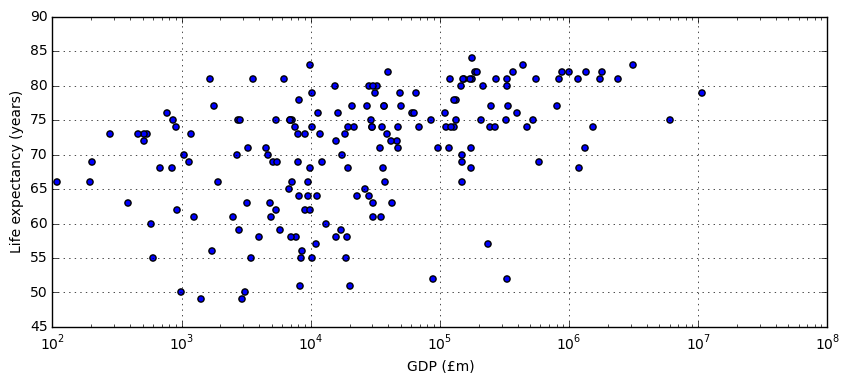

In [0]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (10<sup>4</sup>) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 10<sup>4</sup>), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years. 

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy. 

In [0]:
# the 10 countries with lowest GDP
gdpVsLife.sort(GDP).head(10)

,country,GDP (£m),Life expectancy (years)
87,Kiribati,108,66
141,Sao Tome and Principe,195,66
111,"Micronesia, Fed. Sts.",202,69
168,Tonga,277,73
37,Comoros,383,63
157,St. Vincent and the Grenadines,461,73
140,Samoa,509,73
180,Vanuatu,512,72
65,Grenada,538,73
60,"Gambia, The",578,60


In [0]:
# the 10 countries with highest GDP
gdpVsLife.sort(GDP, ascending=False).head(10)

,country,GDP (£m),Life expectancy (years)
177,United States,10715999,79
35,China,6065182,75
83,Japan,3143957,83
62,Germany,2393529,81
58,France,1795953,82
176,United Kingdom,1733354,81
23,Brazil,1528714,74
81,Italy,1363486,82
138,Russian Federation,1328647,71
75,India,1189826,68


In [0]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort(LIFE).head(10)

,country,GDP (£m),Life expectancy (years)
95,Lesotho,1418,49
160,Swaziland,2916,49
32,Central African Republic,983,50
146,Sierra Leone,3092,50
33,Chad,8276,51
41,Cote d'Ivoire,19998,51
3,Angola,88420,52
124,Nigeria,329100,52
30,Cameroon,18896,55
153,South Sudan,8473,55


<div><a id="Ext"></a></div>

## Extending the project
<br />
<div style="color:purple;font-weight:bold;"><u>Task 1</u><p>To what extent do the ten countries with the highest GDP coincide with the ten countries with the longest life expectancy?</p></div>

In [0]:
#################################
# Extending the project - Task 1
#################################
# To what extent do the ten countries with the highest GDP coincide
# with the ten countries with the longest life expectancy?

# Which to use? sort(LIFE, ascending=False).head(10) or sort(LIFE).tail(10) ?
# The two sort methods don't return the same data frames:
# -Using sort(LIFE, ascending=False).head(10) gives you just Japan and France.
# -Using sort(LIFE).tail(10) gives Italy as well as Japan and France.
# See PROOF below.

# the 10 countries with highest GDP
gdpTopTenHead = gdpVsLife.sort(GDP, ascending=False).head(10) 
#gdpTopTenTail = gdpVsLife.sort(GDP).tail(10)

# the 10 countries with highest life expectancy
lifeTopTenHead = gdpVsLife.sort(LIFE, ascending=False).head(10) 
#lifeTopTenTail = gdpVsLife.sort(LIFE).tail(10)

###### PROOF ###### 
# Proof that sort(LIFE, ascending=False).head(10) and sort(LIFE).tail(10) give different results:
#display(gdpTopTenHead)
#display(gdpTopTenTail)
#display(lifeTopTenHead) 
#display(lifeTopTenTail) 

# What are the differences regarding countries included in each resultant table?
#lifeTopTenTailList = lifeTopTenTail[COUNTRY].tolist()
#lifeTopTenHeadList = lifeTopTenHead[COUNTRY].tolist()
#print(set(lifeTopTenTailList) ^ set(lifeTopTenHeadList)) # Calculate symmetrical difference
####################

In [0]:
print("From the data, just Japan and France have some of the highest GDP figures that coincide with the longest life expectancy figures.")
print("Hence there appears to be no strong correlation between a country's wealth and the life expectancy of its inhabitants.")
display(merge(gdpTopTenHead, lifeTopTenHead,how='inner'))  # Gives just Japan and France
#display(merge(gdpTopTenTail[[COUNTRY]], lifeTopTenTail[[COUNTRY]],how='inner')) # Gives Italy, Japan and France

From the data, just Japan and France have some of the highest GDP figures that coincide with the longest life expectancy figures.
Hence there appears to be no strong correlation between a country's wealth and the life expectancy of its inhabitants.


,country,GDP (£m),Life expectancy (years)
0,Japan,3143957,83
1,France,1795953,82


<div style="color:purple;font-weight:bold;"><u>Task 2</u><p>Which are the two countries in the right half of the
plot (higher GDP) with life expectancy below 60 years? What factors could explain their lower life expectancy compared
to countries with similar GDP? Hint: use the filtering techniques you learned in Week 2 to find the two countries.</p></div>

In [0]:
gdpVsLife[(gdpVsLife[GDP] > 10E4) & (gdpVsLife[LIFE] < 60)]

,country,GDP (£m),Life expectancy (years)
124,Nigeria,329100,52
152,South Africa,234056,57


The two countries with higher GDP (i.e. above £10<sup>5</sup> million) but a life expectancy below 60 are **Nigeria** and **South Africa**.

<div style="color:purple;font-weight:bold;"><u>Task 3</u><p>Redo the analysis using the countries’ GDP per capita
(i.e. per inhabitant) instead of their total GDP. If you’ve done the workbook exercises, you already have a column
with the population data. Hint: write an expression involving the GDP and population columns, as you learned in
Calculating over columns in Week 1. Think about the units in which you display GDP per capita.</p></div>

In [0]:
# 1 Get the GDP data from earlier (missing data and first 34 rows already removed).
# 2 Convert GDP from $ to £ (not £m because we don't want to round it too early and introduce rounding errors).
# 3 Get rid of columns we don't want

GDP = 'GDP (£)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP) # US$ to GB£ 
headings = [COUNTRY, GDP] # Put headings we want to keep in a list                                      
gdpClean = gdpCountries[headings] # Create new dataframe with selected headings 
display(gdpClean.head())

,country,GDP (£)
34,Afghanistan,1.307474e+10
35,Albania,8.168003e+09
36,Algeria,1.340157e+11
38,Andorra,2.076410e+09
39,Angola,8.842001e+10


In [0]:
# 1 Get the POP data
# 2 Clean it by removing missing data and first 34 rows of unwanted data.
# 3 Get rid of columns we don't want

POP = 'SP.POP.TOTL' # NOTE - This 'indicator' is a column name in csv file
popReset = read_csv('WB POP 2013.csv')

popCountries = popReset[34:].dropna() #1
headings = [COUNTRY, POP] #2 Put headings we want to keep in a list                                      
popClean = popCountries[headings] #3 Create new dataframe with selected headings 
popClean.head()

,country,SP.POP.TOTL
34,Afghanistan,30682500
35,Albania,2897366
36,Algeria,38186135
37,American Samoa,55302
38,Andorra,75902


In [0]:
# OK, lets merge gdp and population tables to get one table we can use to calculate 'GDP per capita'.
gdpVsPop = merge(gdpClean, popClean, on=COUNTRY, how='inner')
gdpVsPop.head()

,country,GDP (£),SP.POP.TOTL
0,Afghanistan,1.307474e+10,30682500
1,Albania,8.168003e+09,2897366
2,Algeria,1.340157e+11,38186135
3,Andorra,2.076410e+09,75902
4,Angola,8.842001e+10,23448202


In [0]:
# Create 'GDP per capita' column using an appropriate calculation on the other two columns.
def roundTo2dp (value):
    return round(value, 2) 

GDPPC = 'GDP per capita (£)'

gdpVsPop[GDPPC] = gdpVsPop[GDP] / gdpVsPop[POP]
gdpVsPop[GDPPC] = gdpVsPop[GDPPC].apply(roundTo2dp) # Round GDPPC to 2 decimal places
headings = [COUNTRY, GDPPC] # Put headings we want to keep in a list                                      
gdppc = gdpVsPop[headings]  # Create new dataframe with selected headings 
gdppc.head()

,country,GDP per capita (£)
0,Afghanistan,426.13
1,Albania,2819.11
2,Algeria,3509.54
3,Andorra,27356.47
4,Angola,3770.87


In [0]:
# OK, lets merge gdppc and life expectancy tables to get one table we can work with...
gdppcVsLife = merge(gdppc, lifeClean, on=COUNTRY, how='inner')
gdppcTop3 = gdppcVsLife.sort(GDPPC, ascending=False).head(3)
gdppcBottom3 = gdppcVsLife.sort(GDPPC, ascending=False).tail(3) 
lifeTop3 = gdppcVsLife.sort(LIFE, ascending=False).head(3)
lifeBottom3 = gdppcVsLife.sort(LIFE, ascending=False).tail(3) 
print("Top 3 for GDP per capita (£):")
display(gdppcTop3)
print("Bottom 3 for GDP per capita (£):")
display(gdppcBottom3)
print("Top 3 for life expectancy (years)")
display(lifeTop3)
print("Bottom 3 for life expectancy (years):")
display(lifeBottom3)
print("The UK GDP per capita (£) and life expectancy figures are as shown below:")
display(gdppcVsLife[(gdppcVsLife[COUNTRY] == 'United Kingdom')]) # Sanity check!

Top 3 for GDP per capita (£):


,country,GDP per capita (£),Life expectancy (years)
99,Luxembourg,72679.55,82
125,Norway,65717.26,81
136,Qatar,61400.15,78


Bottom 3 for GDP per capita (£):


,country,GDP per capita (£),Life expectancy (years)
32,Central African Republic,208.62,50
27,Burundi,165.75,56
103,Malawi,153.29,61


Top 3 for life expectancy (years)


,country,GDP per capita (£),Life expectancy (years)
72,"Hong Kong SAR, China",24517.50,84
74,Iceland,30351.62,83
162,Switzerland,54109.81,83


Bottom 3 for life expectancy (years):


,country,GDP per capita (£),Life expectancy (years)
146,Sierra Leone,500.40,50
95,Lesotho,680.50,49
160,Swaziland,2331.38,49


The UK GDP per capita (£) and life expectancy figures are as shown below:


,country,GDP per capita (£),Life expectancy (years)
176,United Kingdom,27038.54,81


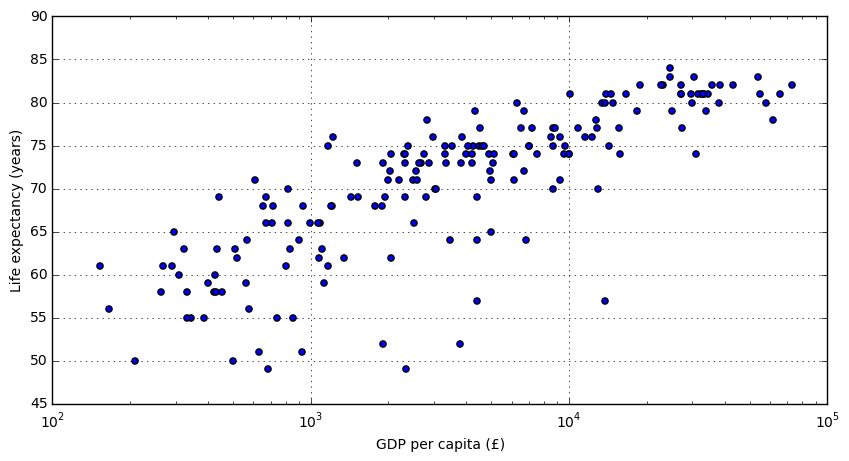

In [0]:
gdppcVsLife.plot(x=GDPPC, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 5))

In [0]:
from scipy.stats import spearmanr

gdppcColumn = gdppcVsLife[GDPPC]
lifeColumn = gdppcVsLife[LIFE]
(correlation, pValue) = spearmanr(gdppcColumn, lifeColumn)
print('The correlation using Spearman ranking is', correlation)
print('The p-value is', pValue)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation using Spearman ranking is 0.850255459772
The p-value is 3.59839537407e-53
It is statistically significant.


## Conclusions

From our analysis, there appears to be no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.

From the chart above, however, we can see that, generally, as **GDP per capita increases so does life expectancy**. Having said that, there is one country with a higher GDP per capita but a life expectancy below 60. This country is Equatorial Guinea, as shown below. This alongside the moderate correlation (0.501, p<0.001) indicates that although there is a general trend between these two variables, there are likely to be other factors involved in this relationship, which should be identified and further investigated.

In [0]:
gdppcVsLife[(gdppcVsLife[GDPPC] > 10000) & (gdppcVsLife[LIFE] < 60)]

,country,GDP per capita (£),Life expectancy (years)
52,Equatorial Guinea,13738.71,57


In [0]:
numberOfRows = len(gdppcVsLife.index) # Get number of rows 
set_option('max_rows', numberOfRows) # Set max_rows option
gdppcSort = gdppcVsLife.sort(GDPPC, ascending=False)
gdppcSort = gdppcSort.reset_index(drop=True) # Reset index and drop old one

print("\nNOTE:\n\nFor GDP per capita, Equatorial Guinea is " + str(gdppcSort[(gdppcSort[COUNTRY] == 'Equatorial Guinea')].index[0]+1) + " out of " + str(len(gdppcSort)) + " countries.")

lifeSort = gdppcVsLife.sort(LIFE, ascending=False)
lifeSort = lifeSort.reset_index(drop=True) # Reset index and drop old one

print("But for life expectancy, Equatorial Guinea is number " + str(lifeSort[(lifeSort[COUNTRY] == 'Equatorial Guinea')].index[0]+1) + "!")


NOTE:

For GDP per capita, Equatorial Guinea is 41 out of 186 countries.
But for life expectancy, Equatorial Guinea is number 171!


<div><a href="#Top"><img style="display:inline" src="http://www.abdn.ac.uk/global/images/layout/to_top_arrow.gif">Top of page</a>
</div>

In [0]:
HTML('''<script>  
function toggler() { 
$('div.input').toggle(); 
location.href="#Bottom";
} 
</script>
<p style="display:inline;"><center>Click <a href="javascript:toggler();">here</a> to toggle code visibility on/off</center></p>
<script>
$('div.input').hide();
location.href="#Top";</script></div>''')

<div><a id="Bottom"></a>&copy; 2016 Phipps E&amp;OE.</div>

<div><a id="#Bottom"></a></div>